<a href="https://colab.research.google.com/github/jimenabarrerau/Actividad_5_Jimena_Uribe/blob/main/Actividad_5_Jimena_Uribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5**

Jimena Uribe Barrera
A01706474

In [193]:
%pip install funpymodeling

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import random

In [195]:
df = pd.read_excel('/content/microretailer_mit_lift_lab (1).xlsx')

In [196]:
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [198]:
df.shape

(171, 106)

In [199]:
df.dtypes

_record_id                               object
_title                                   object
_server_updated_at                       object
_updated_by                              object
_geometry                                object
                                         ...   
234_willingness_participate_workshop     object
318_shopkeeper_name                      object
319_shopkeepers_last_name                object
236_whatsapp                            float64
235_email                                object
Length: 106, dtype: object

In [200]:
#Separación de columnas según dtype para diferentes métodos de imputacióm
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(method='ffill', inplace=True)
        df[column].fillna(method='bfill', inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [201]:
#Comprobación de nulos
nulos = df.isnull().sum()
nulos
df2 = pd.DataFrame({'Column': df.columns, 'type':df.dtypes, 'nulos':nulos})
df3 = pd.DataFrame(df2['nulos']>0)
df3.value_counts()

nulos
False    102
True       4
dtype: int64

In [202]:
#Limpieza con desviación estándar
y=df
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.014851e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.337392e+01
4_number_permanent_employees_last_year               1.207390e+01
103_number_own_fridges                               6.265890e+00
145_number_direct_competitors                        1.212786e+01
24_burnout                                           6.836495e+00
271_card_fee                                                  NaN
272_card_days_receive_money                          2.355266e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

<ipython-input-202-43ba6c011592>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-202-43ba6c011592>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-202-43ba6c011592>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence

In [203]:
df4= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df=df.fillna(round(df4.mean(),1))

<ipython-input-203-013d3da5f6ab>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df4= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]


<Figure size 1500x800 with 0 Axes>

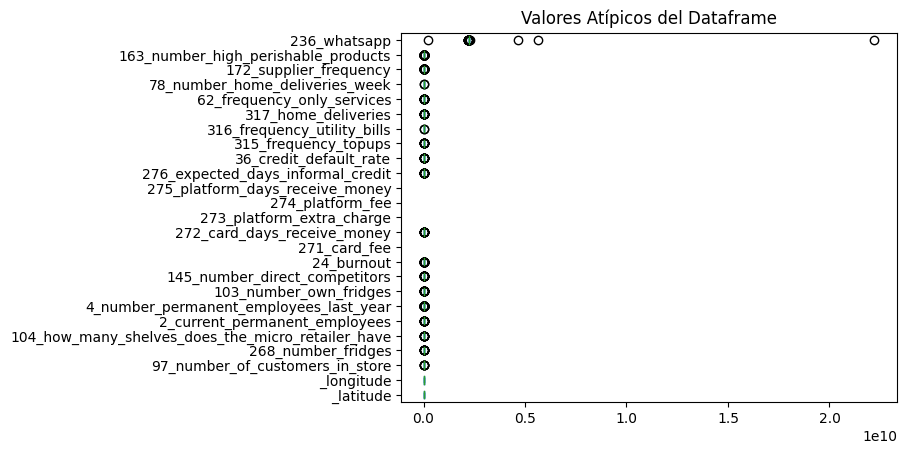

In [204]:
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

Tabla de frecuencias para la variable '19_tax_id':
yes    123
no      48
Name: 19_tax_id, dtype: int64


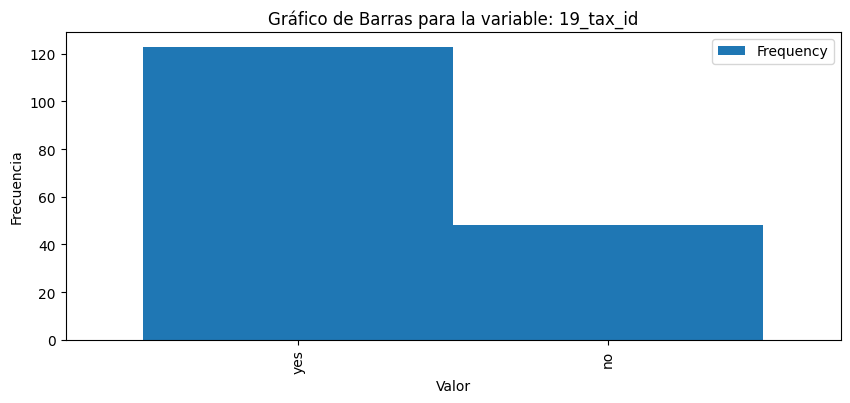

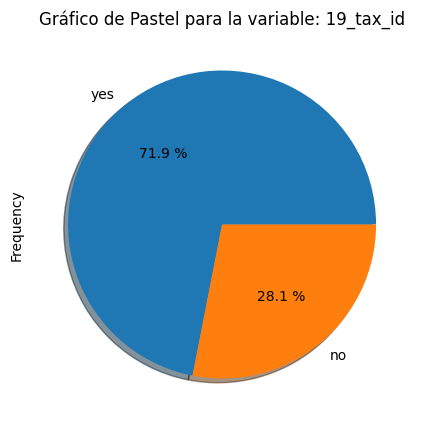

Tabla de frecuencias para la variable '42_willingness_share_inventory_data_suppliers':
Totalmente en desacuerdo          97
Algo de acuerdo                   38
Algo en desacuerdo                17
Totalmente de acuerdo             11
Ni de acuerdo ni en desacuerdo     8
Name: 42_willingness_share_inventory_data_suppliers, dtype: int64


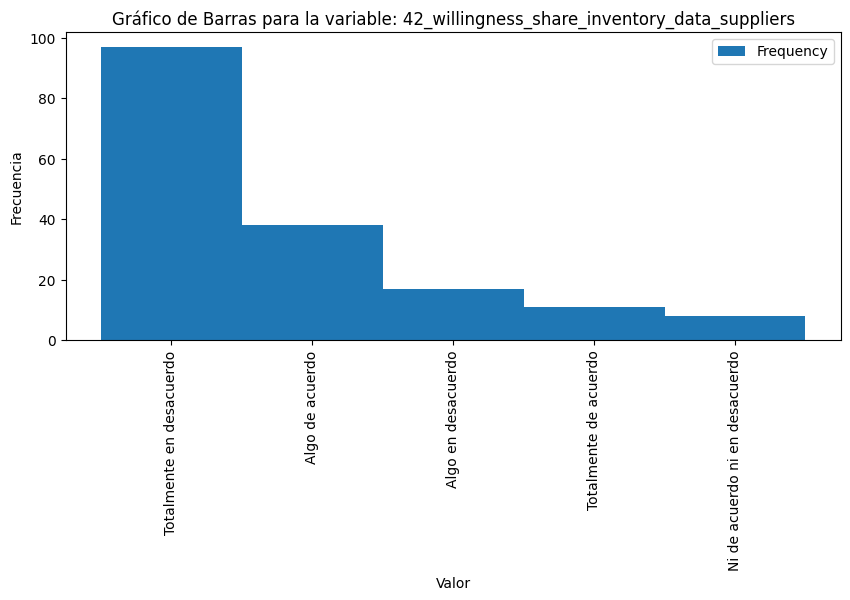

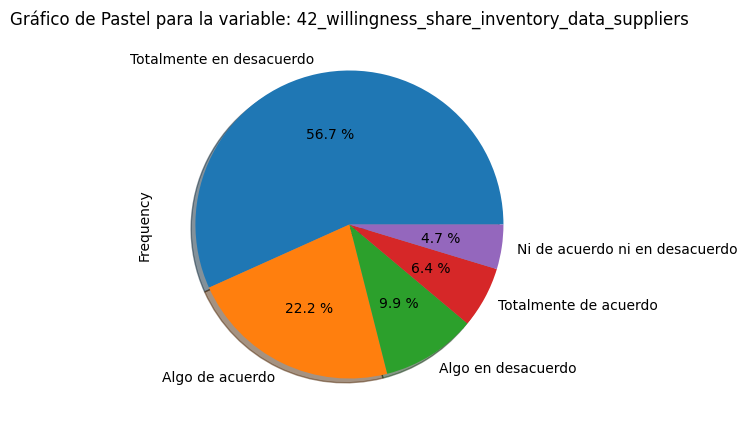

Tabla de frecuencias para la variable '46_willingness_reorder_suppliers_variety':
Totalmente en desacuerdo          73
Algo de acuerdo                   42
Totalmente de acuerdo             27
Algo en desacuerdo                19
Ni de acuerdo ni en desacuerdo    10
Name: 46_willingness_reorder_suppliers_variety, dtype: int64


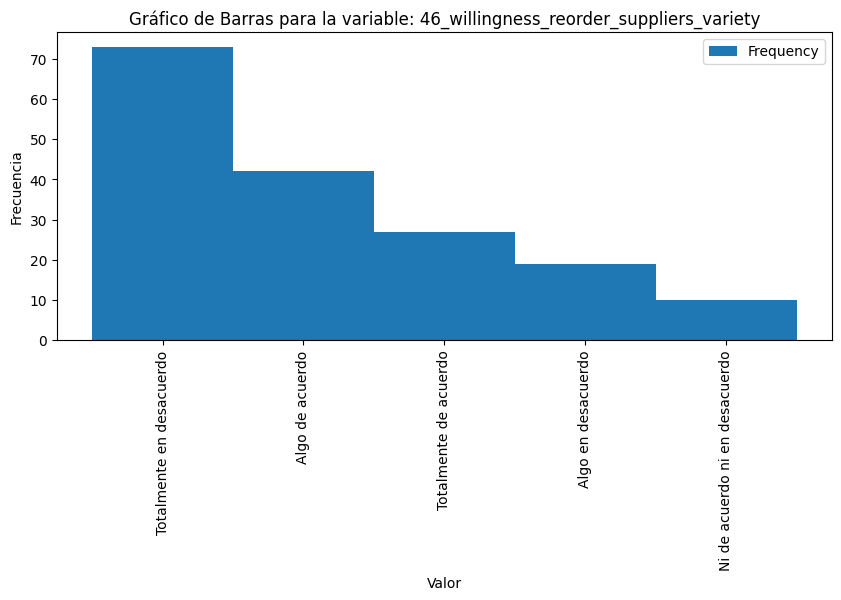

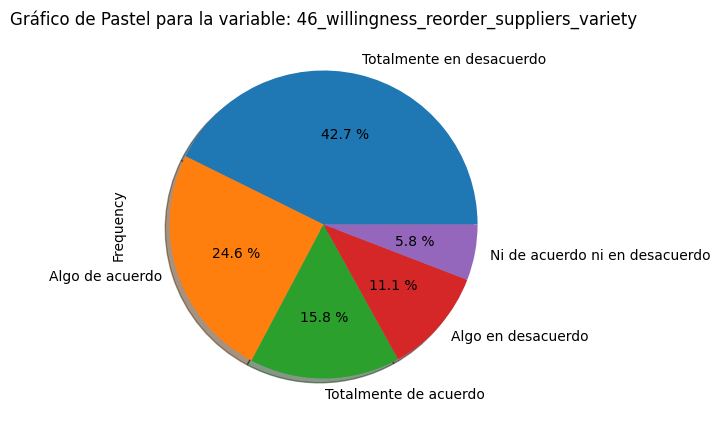

Tabla de frecuencias para la variable '56_procurement_changes_pandemic':
no     117
yes     54
Name: 56_procurement_changes_pandemic, dtype: int64


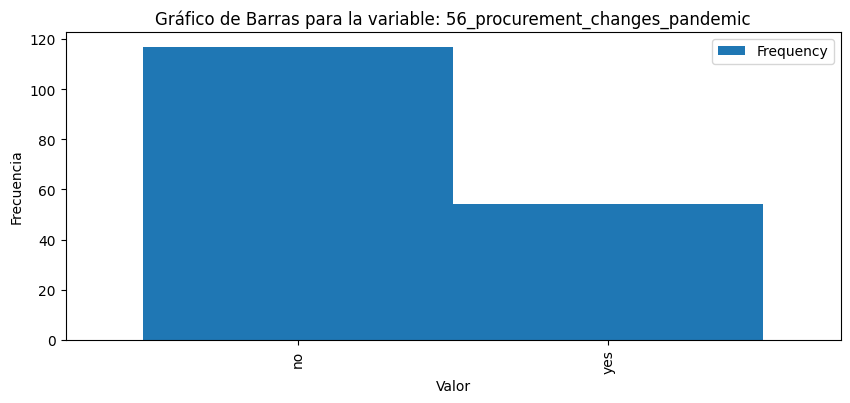

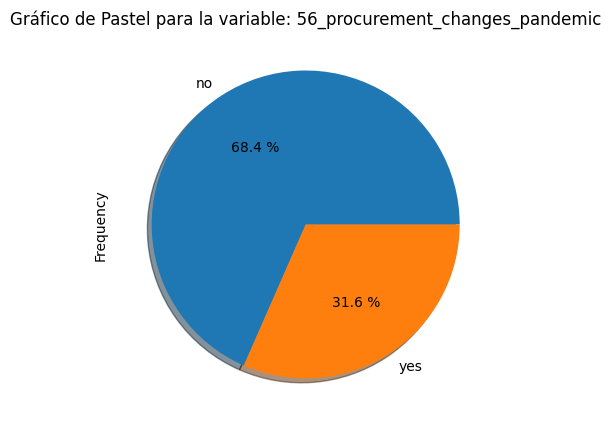

Tabla de frecuencias para la variable '210_sales_channels':
WhatsApp                                                                                                                                 26
Llamada a Teléfono fijo                                                                                                                  19
Redes sociales (e.g. Facebook, Instagram),WhatsApp                                                                                       17
Redes sociales (e.g. Facebook, Instagram)                                                                                                16
Llamada a Teléfono celular                                                                                                               14
Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp                                                            14
Llamada a Teléfono celular,WhatsApp                                                                 

In [ ]:
columnasobj = [col for col in df.columns if df[col].dtype == 'object']

muestra = random.sample(columnasobj, 20)

i = 0


for column in muestra:
    #análisis univariado
    table1 = df[column].value_counts()
    print(f"Tabla de frecuencias para la variable '{column}':")
    print(table1)

    #Ajustar el índice del DataFrame filtrado
    filtro_index = table1.reset_index()
    filtro_index.columns = ['Value', 'Frequency']

    #Gráfico de barras
    filtro_index.plot(x='Value', y='Frequency', kind='bar', width=1, figsize=(10, 4))
    plt.title(f'Gráfico de Barras para la variable: {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()  # Muestra el gráfico

    #Gráfico de pastel
    filtro_index.set_index('Value', inplace=True)
    filtro_index['Frequency'].plot(kind='pie', figsize=(10, 5), shadow=True, autopct="%0.1f %%")
    plt.title(f'Gráfico de Pastel para la variable: {column}')
    plt.show()

    i += 1
